# Load Imports and Data

In [1]:
from model.model import *
from preprocess import *
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
download()
alldat = load()
print("Data Loaded. Proceeding to Preprocessing...")
session = 12

Loading data. Patience, padawan ...
Data Loaded. Proceeding to Preprocessing...


# Preprocess Data
Preprocess data using the preprocessing function and split into train and test sets. Verbosity sets whether or not to print out at the end

In [3]:
dfs = preprocess(alldat, verbose = True)
train, test = train_test_split(dfs)

[float64]   	session             	session number, indexed 0 - 38
[object]   	session_type        	session type, train / test
[object]   	mouse_name          	name of the mouse
[float64]   	trial_number        	trial number, indexed 0 to num_trials
[bool]   	go_trial            	true if go_trial, false if no-go trial
[float64]   	gocue               	time of go cue, in ms
[float64]   	response_time       	time of response, in ms
[float64]   	latency             	response time - go cue, in ms
[float64]   	mouse_resp          	mouse response for a given trial
[object]   	wheel_velocity      	velocity of the wheel
[object]   	wheel_acceleration  	acceleration of the wheel (first derivative of velocity)
[float64]   	feedback_onset      	feedback onset (reward or punishment)
[float64]   	feedback_type       	-1 if punish, 0 if none, 1 if reward
[float64]   	contrast_left       	left contrast
[float64]   	contrast_right      	right contrast
[float64]   	contrast_diff       	contrast left - co

In [4]:
train.head()

,session,session_type,mouse_name,trial_number,go_trial,gocue,response_time,latency,mouse_resp,wheel_velocity,...,fut_acc,fut_latency,fut_difficulty,zeros,gocue_vel_trial,gocue_acc_trial,stim_vel_trial,stim_acc_trial,rt_vel_trial,rt_acc_trial
0,0.0,train,Cori,0.0,True,1027.216250,1150.203633,122.987383,1.0,"[-1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",...,1.0,525.089054,0.5,0,"[18.0, 17.0, 15.0, 13.0]","[-1.0, -2.0, -2.0, -3.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[10.0, 11.0, 11.0, 13.0]","[1.0, 0.0, 2.0, 0.0]"
1,0.0,train,Cori,1.0,True,874.413814,1399.502868,525.089054,-1.0,"[0.0, -1.0, 0.0, -1.0, 0.0, 1.0, 0.0, 1.0, 1.0...",...,1.0,124.078016,0.5,0,"[-6.0, -5.0, -4.0, -4.0]","[1.0, 1.0, 0.0, 1.0]","[0.0, -1.0, 0.0, -1.0]","[-1.0, 1.0, -1.0, 1.0]","[-7.0, -7.0, -6.0, -5.0]","[0.0, 1.0, 1.0, 0.0]"
2,0.0,train,Cori,2.0,True,825.213029,949.291045,124.078016,1.0,"[0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0...",...,1.0,1505.189657,1.0,0,"[6.0, 6.0, 8.0, 9.0]","[0.0, 2.0, 1.0, 2.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[9.0, 7.0, 6.0, 6.0]","[-2.0, -1.0, 0.0, -2.0]"
3,0.0,train,Cori,3.0,False,761.612015,2266.801672,1505.189657,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",...,0.0,154.765410,0.5,0,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, -1.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",[],[]
4,0.0,train,Cori,4.0,True,662.010427,816.775837,154.765410,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0,...",...,0.0,330.288154,1.0,0,"[13.0, 14.0, 14.0, 14.0]","[1.0, 0.0, 0.0, -2.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[2.0, 2.0, 2.0, 2.0]","[0.0, 0.0, 0.0, 1.0]"


# Plot
Plot, like, everything. But not everything. Just some things.


In [5]:
print(train["go_trial"])

0         True
1         True
2         True
3        False
4         True
         ...  
10045     True
10046     True
10047     True
10048     True
10049     True
Name: go_trial, Length: 7814, dtype: bool


In [6]:
from sklearn.utils import shuffle
train["delta_difficulty"] = train["fut_difficulty"] - train["pres_difficulty"]
train["shuffled_pres_acc"] = shuffle(train["pres_acc"])

/Users/jordanlei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jordanlei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
train["pres_acc"][:100].to_numpy()

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [83]:
a = shuffle(train["fut_latency"])
print(a)
train["shuffled_fut_lat"] = a.to_numpy()

4837     301.751993
9659    1508.520795
8166    1503.730227
2858      56.361590
9001    1502.878316
           ...     
9509     182.933967
7307    1507.509883
3975    1505.854461
82       121.450994
1951     986.396704
Name: fut_latency, Length: 7814, dtype: float64


/Users/jordanlei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [80]:
train["shuffled_pres_acc"]

0        0
1        0
2        1
3        1
4        0
        ..
10045    0
10046    0
10047    1
10048    0
10049    1
Name: shuffled_pres_acc, Length: 7814, dtype: int64

In [8]:
import seaborn as sns
sns.set()
def plots(df, y = "fut_latency", features = ["pres_acc", "fut_latency"], filter_: dict= None, hue = None, title = None):
    if filter_ is not None: 
        for key in filter_.keys(): 
            df = df[df[key] == filter_[key]]

    for feature in features:
        if df[feature].dtype in [float, int]:
            if len(list(set(df[feature].dropna()))) < 10:
                plt.figure()
                sns.violinplot(df[feature], df[y])  
                plt.xlabel(feature)
                plt.ylabel(y)
            else: 
                plt.figure()
                sns.scatterplot(feature, y, data = df, hue=hue, alpha= 0.7)
                plt.xlabel(feature)
                plt.ylabel(y)
            plt.title(title)

                
def histograms(df, x, by: str, filter_:dict = None, title = None):
    if filter_ is not None: 
        for key in filter_.keys(): 
            df = df[df[key] == filter_[key]]
    
    plt.figure()
    for val in set(df[by]):
        plt.hist(x = x, data = df[df[by]==val], density = True, alpha = 0.7, label = "%s: %s"%(by, val), bins = 15)
        plt.xlabel(x)
    
    plt.legend()
    plt.title(title)

/Users/jordanlei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()
/Users/jordanlei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()
/Users/jordanlei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`m

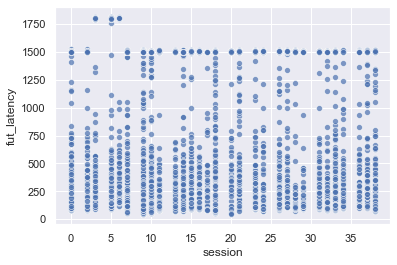

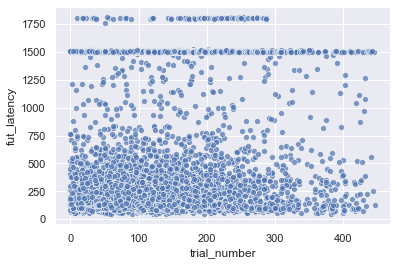

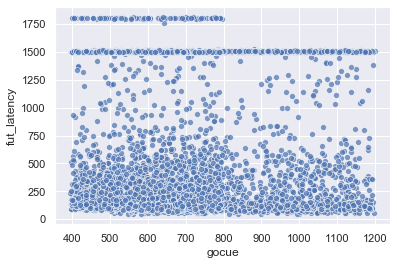

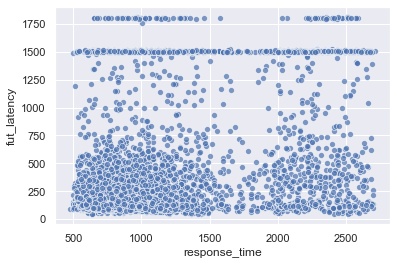

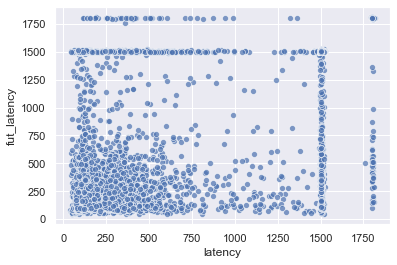

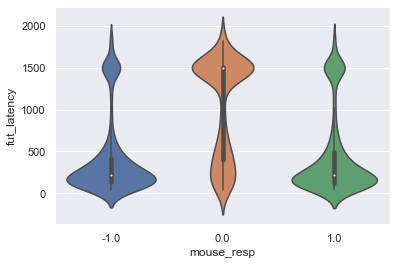

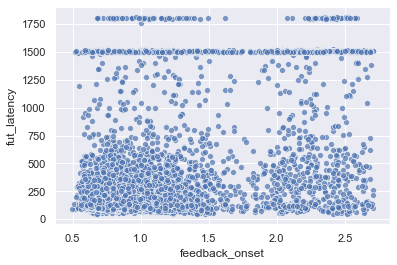

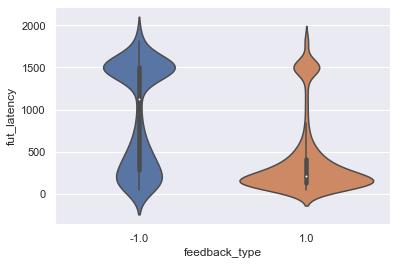

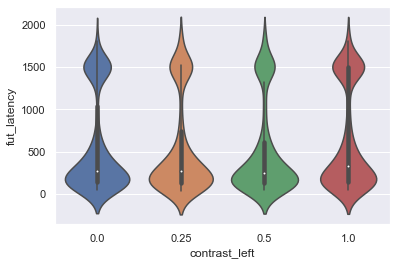

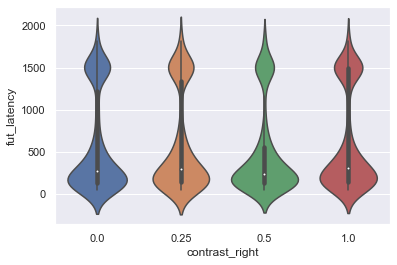

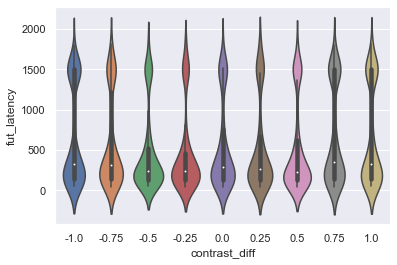

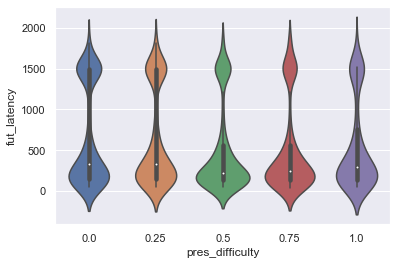

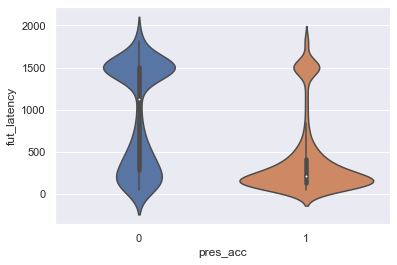

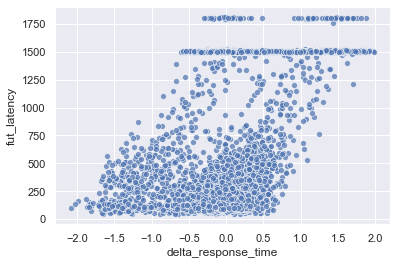

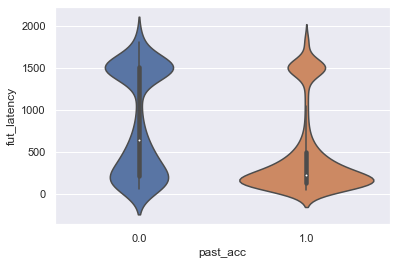

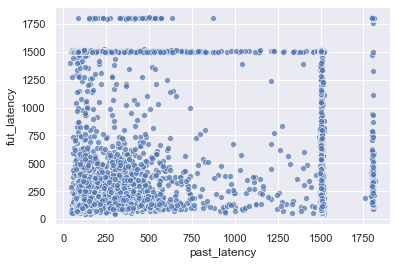

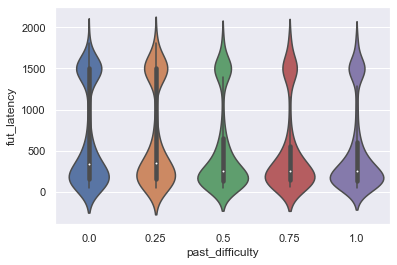

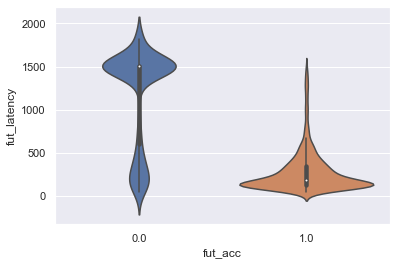

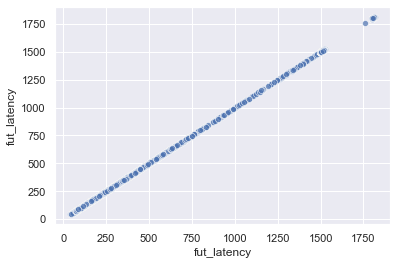

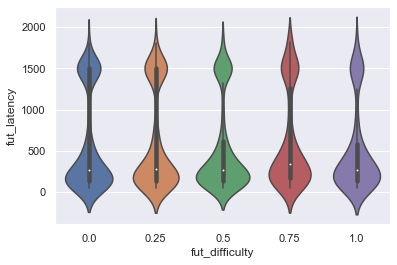

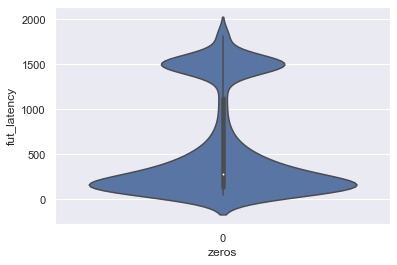

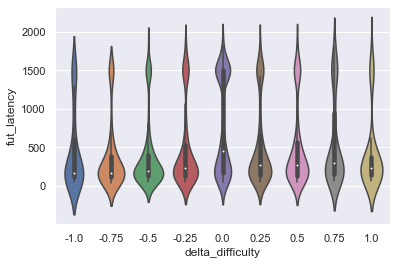

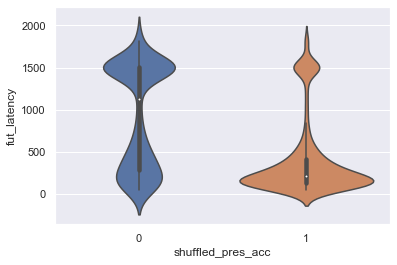

In [9]:
f = {"go_trial": True, "fut_go_trial": True}
plots(train, features=train.columns, filter_= f)

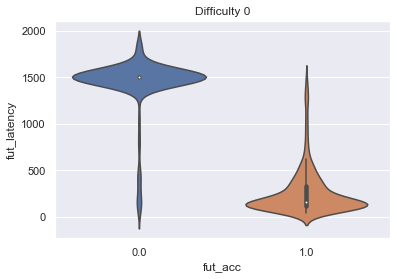

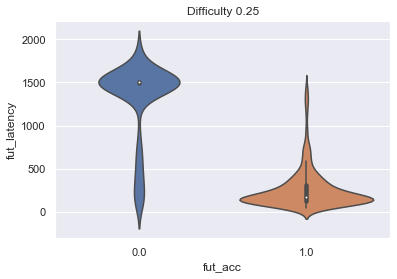

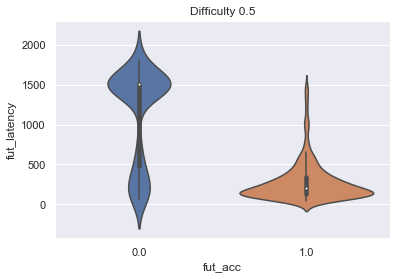

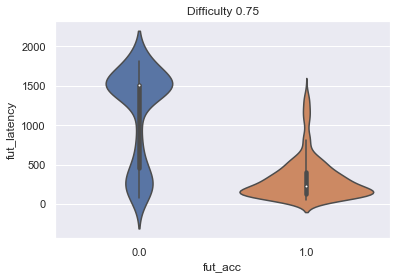

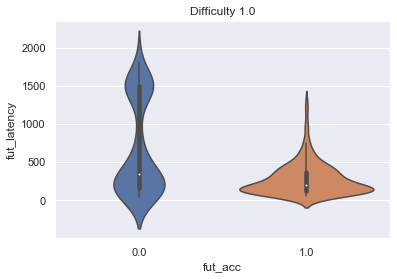

In [10]:
for i in [0, 0.25, 0.5, 0.75, 1.0]:
    f = {"fut_difficulty": i, "go_trial": True, "fut_go_trial": True}
    plots(train, y = "fut_latency", features = ["fut_acc"], filter_ = f, title = "Difficulty %s"%i)

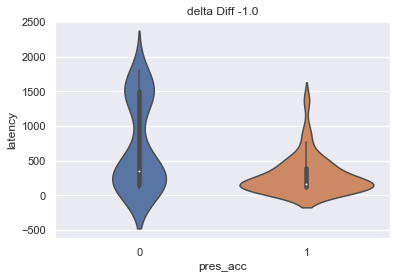

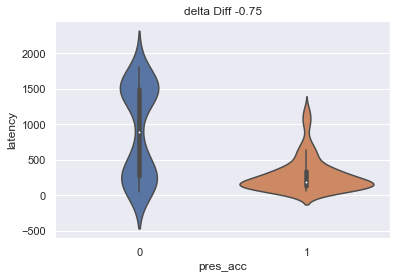

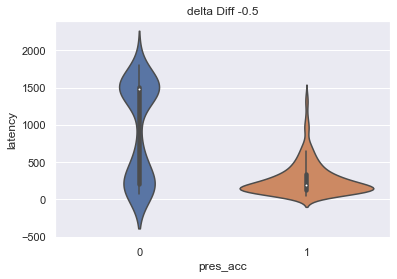

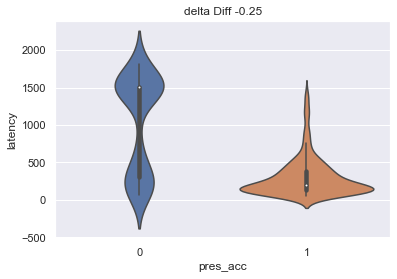

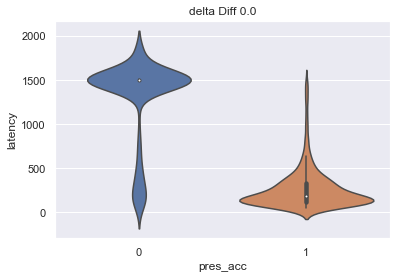

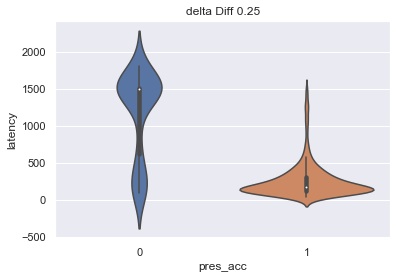

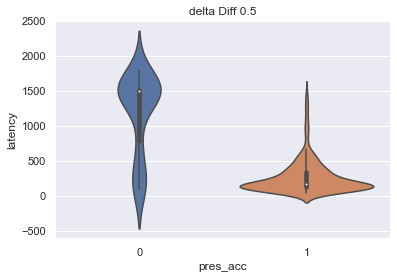

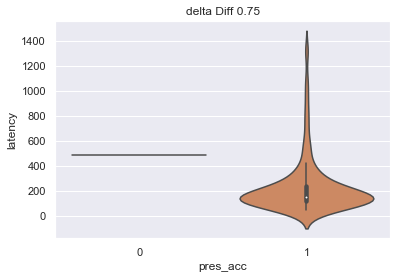

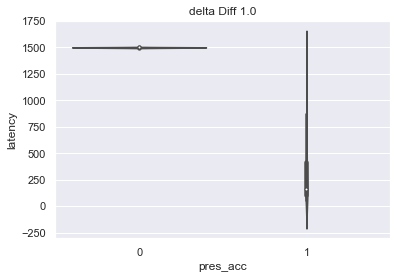

In [11]:
for i in np.arange(-1, 1.25, 0.25):
    f = {"delta_difficulty": i, "go_trial": True, "fut_go_trial": True}
    plots(train, y = "latency", features = ["pres_acc"], filter_ = f, title = "delta Diff %s"%i)

In [12]:
plots(train, y ="response_time_diff", features= ["delta_difficulty"])

KeyError: 'response_time_diff'

<Figure size 432x288 with 0 Axes>

In [37]:
import numpy as np
np.arange(-1, 1.25)

array([-1.,  0.,  1.])

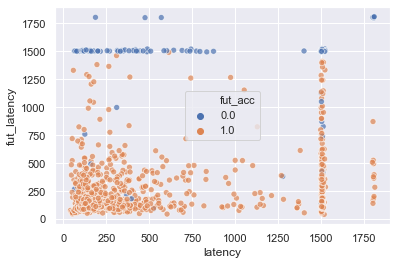

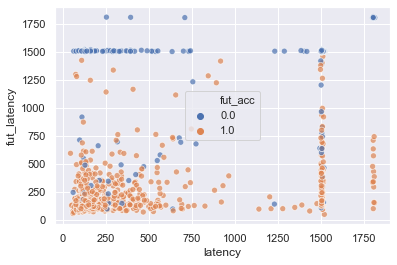

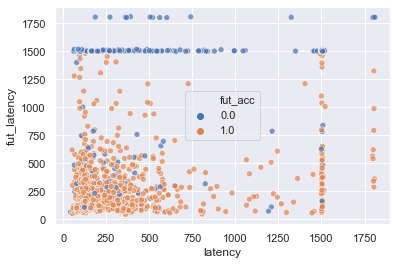

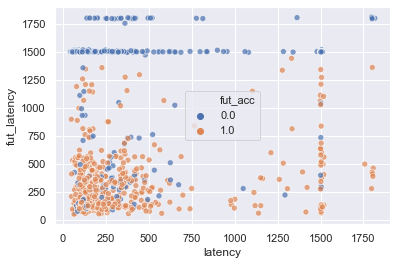

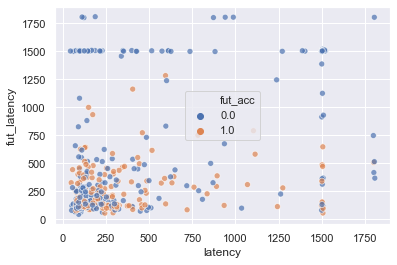

In [72]:
for i in [0, 0.25, 0.5, 0.75, 1.0]:
    f = {"fut_difficulty": i, "go_trial": True, "fut_go_trial": True}
    plots(train, y= "fut_latency", features = ["latency"], filter_= f, hue= "fut_acc")

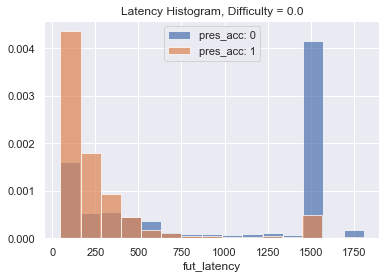

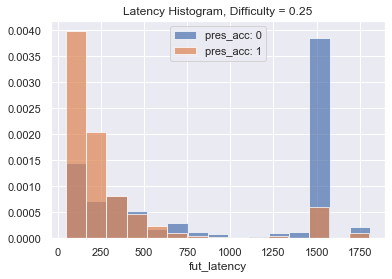

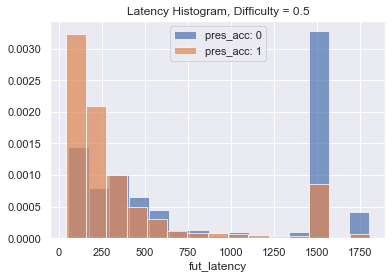

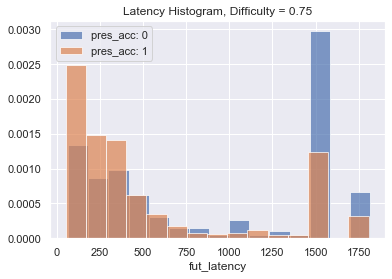

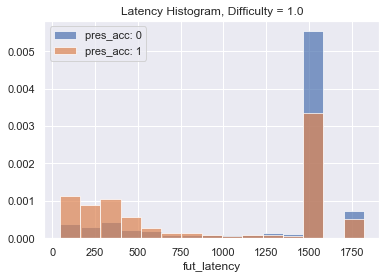

In [73]:
sns.set()

for i in np.arange(0, 1.25, 0.25):
    f = {"fut_difficulty": i}
    histograms(train, "fut_latency", by= "pres_acc", filter_ = f, title = "Latency Histogram, Difficulty = %s"%i)